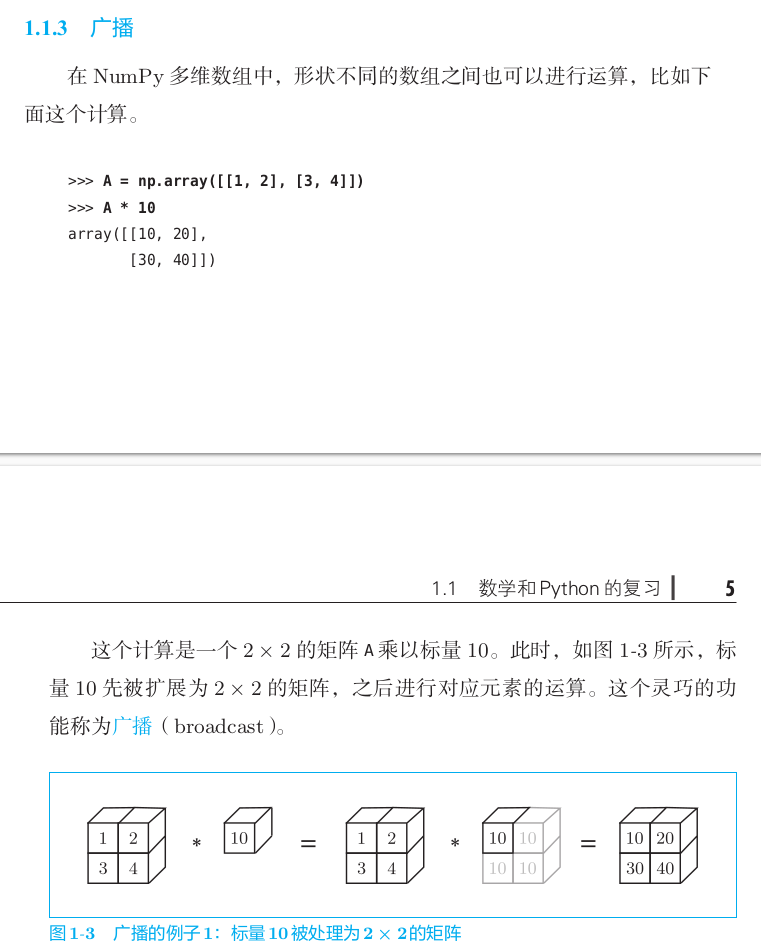

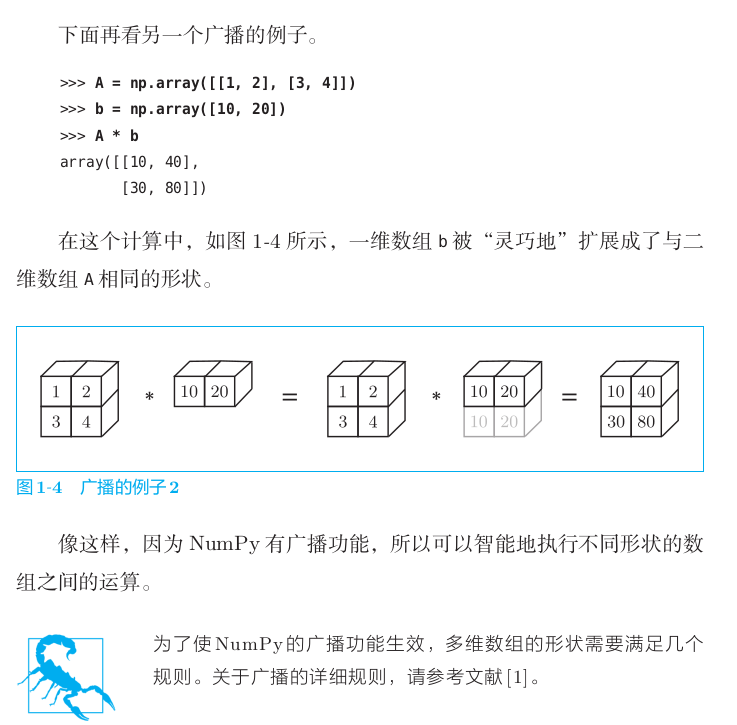

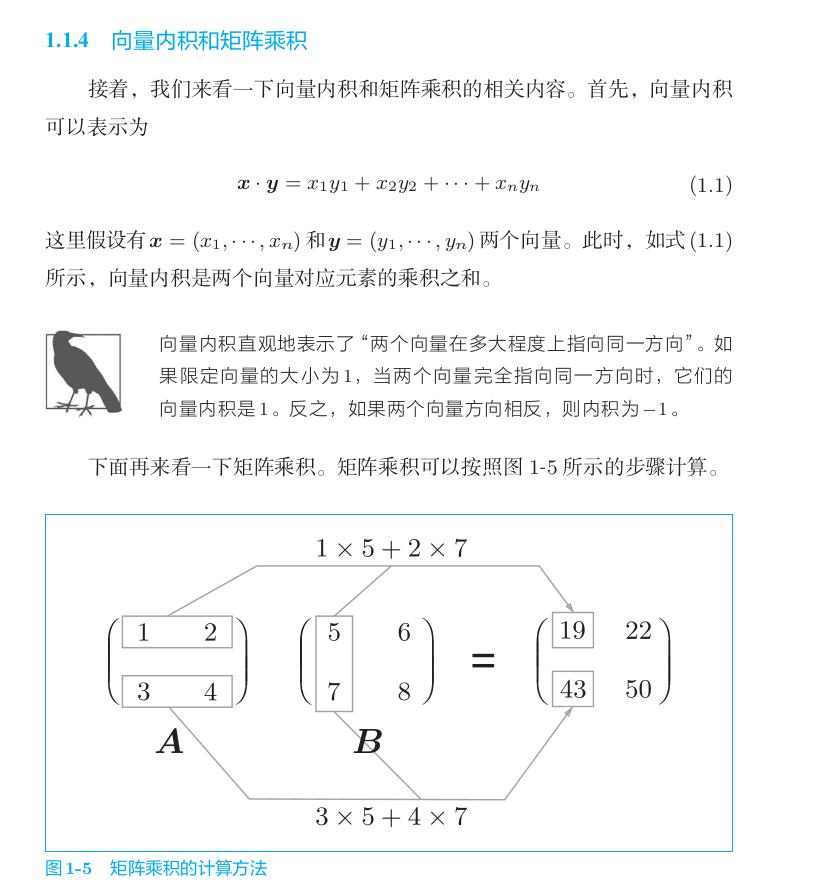

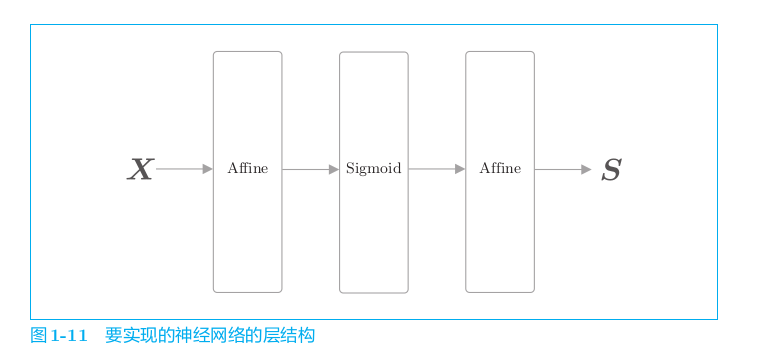

In [1]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    

In [2]:
class Affine:
    def __init__(self, W, b) -> None:
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

In [3]:
np.random.randn(2, 4)

array([[ 0.34765697,  2.26093186,  0.92419315,  2.1088215 ],
       [-0.1563173 , -0.27060421,  1.22573059,  0.59087186]])

In [4]:
# Python 中可以使用 + 运算符进行列表之间的拼接。下面是一个简单的例子。
a = ['A', 'B']
a += ['C', 'D']
a

['A', 'B', 'C', 'D']

In [5]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size) -> None:
        I, H, O = input_size, hidden_size, output_size

        # 初始化权重和偏置
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 生成层
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]

        # 将所有的权重整理到列表中
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x


In [7]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
s

array([[-2.59331952,  0.32660735,  3.28624583],
       [-2.13055478,  0.15342943,  3.22935397],
       [-1.62733727,  0.01229896,  3.00203434],
       [-2.56490003,  0.33582611,  3.29931213],
       [-1.31877734, -0.42354655,  2.24125191],
       [-2.85212975,  0.4391383 ,  3.26025237],
       [-1.54190012, -0.55007445,  2.43767052],
       [-1.92557395, -0.15617604,  3.03778178],
       [-1.86014811, -0.08838635,  3.06665696],
       [-3.02310491,  0.80608735,  3.47883288]])

In [2]:
import cupy as np
np.cuda.set_allocator(np.cuda.MemoryPool().malloc)

print('\033[92m' + '-' * 60 + '\033[0m')
print(' ' * 23 + '\033[92mGPU Mode (cupy)\033[0m')
print('\033[92m' + '-' * 60 + '\033[0m\n')

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.maximum(0, x)


def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 在监督标签为one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size